# Project: Wrangle and Analyze Data


## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangling)
- [Part I - Data Gathering](#gather)
- [Part II - Data Assessment](#assess)
- [Part III - Data Cleaning](#clean)
- [Data Analysis and Visualization](#dav)

<a id='intro'></a>
### Introduction

This project aims to wrangle a Twitter account data, named WeRateDogs. This twitter account rates people's dogs with a humorous comment about the dog. However, the Twitter archive contains basic tweet information, such as the tweet ID, timestamp, and text, for all 5000+ of their tweets as they stood on August 1, 2017. Therefore, to boost the quality of the analyses and visualizations, it is essential to wrangle the data starting with gathering, assessing, and ending with cleaning the data.

<a id='wrangling'></a>
### Data Wrangling

In this process, the data will be gathered, assessed, and cleaned to analyze the data efficiently and neatly.

<a id='gather'></a>
#### Part I - Data Gathering

Three pieces of data will be gathered in this project, these include:

1. **The WeRateDogs Twitter archive**, which is stored [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv).

2. **The tweet image predictions**, the file is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and through this [URL](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).

3. **Twitter API for each tweet's JSON data**,  this is extracted by using Python's Tweepy library. Each tweet's JSON data will be written to its own line and stored in a file called tweet_json.txt file. Later, we will read the .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

To get started, let's import our libraries.

In [1]:
# import packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Let's gather the WeRateDogs Twitter archive and store it in *WeRateDogs_df*.

In [2]:
# Load the dataset of WeRateDogs Twitter archive
WeRateDogs_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Let's gather the tweet image predictions and store it in *img_pred_df*.

In [3]:
url = 'https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv'
response = requests.get(url)

In [4]:
# Save the HTML of the image predictions to file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [5]:
img_pred_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Since Twitter has not authorized me to access the account, I will be using the file provided in the Udacity classroom, "tweet_json.txt", which stores the JSON data for each Tweet. However, the Twitter API code to gather the data is shown below.

##### Twitter API code
`consumer_key = 'XXXX'` <br>
`consumer_secret = 'XXXX'` <br>
`access_token = 'XXXX'` <br>
`access_secret = 'XXXX'` <br>

`auth = tweepy.OAuthHandler(consumer_key, consumer_secret)` <br>
`auth.set_access_token(access_token, access_secret)` <br>

`api = tweepy.API(auth)`

In [6]:
# Load the tweet json text file
tweet_df = pd.read_json('tweet-json.txt', lines=True)

In [7]:
tweet_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [8]:
tweet_df = tweet_df[['id', 'retweet_count', 'favorite_count']]
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
#### Part II - Data Assessment

In this step, each dataset will be inspected visually and programmatically for two things: data quality issues (i.e., content issues) and lack of tidiness (i.e., structural issues).

1. Let's start with WeRateDogs Twitter archive, *WeRateDogs_df*.

In [9]:
# Visualize the dataframe
WeRateDogs_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1884,674800520222154752,NaN,NaN,2015-12-10 03:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedders. He broke his leg saving babie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674800520...,11,10,Tedders,None,None,None,None
2108,670452855871037440,NaN,NaN,2015-11-28 04:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog can't see its haters. 11/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670452855...,11,10,None,None,None,None,None
2317,666644823164719104,NaN,NaN,2015-11-17 15:51:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,None,None,None,None
489,813910438903693312,NaN,NaN,2016-12-28 00:52:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chubbs. He dug a hole and now he's stu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813910438...,11,10,Chubbs,doggo,None,None,None
821,770293558247038976,NaN,NaN,2016-08-29 16:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. There's nothing abnormal abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770293558...,10,10,Jackson,None,None,None,None


In [10]:
# A summary of the dataframe including the number of non-null values in each column
WeRateDogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
# The number of the unique value in each column
WeRateDogs_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [12]:
# check the rating numerator descriptive statistics
WeRateDogs_df['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
# Find out the unique values
WeRateDogs_df['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [14]:
# check the rating denominator descriptive statistics
WeRateDogs_df['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [15]:
# Find out the unique values
WeRateDogs_df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

2. Let's now assess the image predictions dataset, *img_pred_df*.

In [16]:
img_pred_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1410,770655142660169732,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,0.091572,False
1778,828408677031882754,https://pbs.twimg.com/media/C38ZSzlWIAEpQzs.jpg,1,Weimaraner,0.133033,True,Chesapeake_Bay_retriever,0.092227,True,American_Staffordshire_terrier,0.065094,True
284,671141549288370177,https://pbs.twimg.com/media/CVBfrU9WUAApDeV.jpg,1,guinea_pig,0.387728,False,wood_rabbit,0.171681,False,borzoi,0.075358,True
584,678969228704284672,https://pbs.twimg.com/media/CWwu6OLUkAEo3gq.jpg,1,Labrador_retriever,0.680251,True,Chesapeake_Bay_retriever,0.201697,True,golden_retriever,0.019676,True
1373,762471784394268675,https://pbs.twimg.com/ext_tw_video_thumb/76247...,1,Samoyed,0.540276,True,standard_poodle,0.279802,True,toy_poodle,0.102058,True


In [17]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# The number of the unique value in each column
img_pred_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [19]:
# A count of the duplicates in the dataset
sum(img_pred_df['jpg_url'].duplicated())

66

In [20]:
# Check if all the images contain dog or if the image prediction algorithm failed to find the dog in the image.
img_pred_df.query("(p1_dog == False) and (p2_dog == False) and (p3_dog == False)")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [21]:
# Check if all the images contain dog or if the image prediction algorithm failed to find the dog in the image.
img_pred_df.query("(p1_dog == False) and (p2_dog == False) and (p3_dog == False)").shape[0]

324

3. Let's now assess the tweet count dataset, *tweet_df*.

In [22]:
tweet_df.sample(5)

,id,retweet_count,favorite_count
1387,700167517596164096,836,2903
1827,676237365392908289,331,1335
1551,688908934925697024,874,2310
1279,708810915978854401,7848,18036
1876,675047298674663426,366,1141


In [23]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
sum(tweet_df['id'].duplicated())

0

##### Summary of the  Data Assessment

#### Quality issues <br>

* **WeRateDogs Twitter archive table**
  1. The dataset contains retweeted tweets.
  2. There are multiple columns with missing data and are not necessary for the analysis.
  3. The data type of *timestamp* is a string instead of DateTime.
  4. The four columns of the dog stages contain null values, but it is filled the word None instead.
  5. There are errors with name extraction.
  6. The source column has extra data. <br>
  (The two issues below are beyond this analysis. Additional information is required to fix them.)
  7. The rating_denominator has values greater than 10.
  8. The rating_numerator has values below 10. <br> <br>
* **Image predictions table**
  9. There are duplicated jpg_url.<br>
  10. There are images not related to dogs / the image prediction algorithm failed in finding the dog in the image.
  11. There is an underscore (_) and dash (-) in the name of the dog breed instead of a space. <br> <br>

- **Tweet count table**
  12. The tweet id column named id instead of tweet_id.

#### Tidness issues
  1. The stages in the WeRateDogs_df are separated into four columns instead of being in one column.
  2. The three datasets are separated while it has the same tweet id.

<a id='clean'></a>
#### Part III - Data Cleaning

In [25]:
# Create copies of the datasets
WeRateDogs_df_clean = WeRateDogs_df.copy()
img_pred_df_clean = img_pred_df.copy()
tweet_df_clean = tweet_df.copy()

#### Quality 1 - *WeRateDogs Twitter archive table*

**Define:**
Delete the rows with retweeted tweets.

**Code**

In [26]:
index_RT = WeRateDogs_df_clean[WeRateDogs_df_clean['retweeted_status_id'].notnull()==True].index
WeRateDogs_df_clean.drop(index_RT, inplace=True)

**Test**

In [27]:
WeRateDogs_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Quality 2 - *WeRateDogs Twitter archive table*

**Define:**
Delete the unnecessary columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)  from the dataset.

**Code**

In [28]:
WeRateDogs_df_clean = WeRateDogs_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

**Test**

In [29]:
WeRateDogs_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Quality 3 - *WeRateDogs Twitter archive table*

**Define:**
Change the datatype of timestamp from string to datetime.

**Code**

In [30]:
# Fix the datatype
WeRateDogs_df_clean['timestamp'] = pd.to_datetime(WeRateDogs_df_clean['timestamp'])

**Test**

In [31]:
WeRateDogs_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Quality 4 & Tidness 1 - *WeRateDogs Twitter archive table*

**Define:**
Melt the stage of the dog from the four columns and place it into new column *stage* with deleting the others. Hence, replace the None values with null values.

**Code**

In [32]:
# Melt the stage of the dog from the four columns and place it into new column (stage)
WeRateDogs_df_clean = pd.melt(WeRateDogs_df_clean, id_vars =['tweet_id', 'timestamp', 
                                                             'source', 'text', 
                                                             'expanded_urls',
                                                             'rating_numerator',
                                                             'rating_denominator', 'name'],
                              var_name = 'var', value_name = 'stage')

In [33]:
# Drop the extra var_name column
WeRateDogs_df_clean = WeRateDogs_df_clean.drop('var', axis=1)

In [34]:
# Delete the duplicate rows created from the previous step
WeRateDogs_df_clean = WeRateDogs_df_clean.sort_values('stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [35]:
# Empty the stage entries with None
WeRateDogs_df_clean['stage'].replace('None', np.nan, inplace=True)

**Test**

In [36]:
WeRateDogs_df_clean.stage.value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: stage, dtype: int64

In [37]:
WeRateDogs_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   stage               344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 169.9+ KB


#### Quality 5 - *WeRateDogs Twitter archive table*

**Define:**
Replace the wrong extracted names with NaN.

**Code**

In [38]:
WeRateDogs_df_clean.name = WeRateDogs_df_clean.name.str.replace('^[a-z]+', 'None')
WeRateDogs_df_clean['name'].replace('None', np.nan, inplace=True)

**Test**

In [39]:
WeRateDogs_df_clean.name.value_counts()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny       9
           ..
Ken         1
Carper      1
BeBe        1
Ronduh      1
Lance       1
Name: name, Length: 930, dtype: int64

In [40]:
WeRateDogs_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1391 non-null   object             
 8   stage               344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 169.9+ KB


#### Quality 6 - *WeRateDogs Twitter archive table*

**Define:**
Extract the source information from the HTML tag.

**Code**

In [41]:
WeRateDogs_df_clean['source']=WeRateDogs_df_clean['source'].str.extract('^<a.+>(.+)</a>$')

**Test**

In [42]:
WeRateDogs_df_clean['source']

2095    Twitter for iPhone
2094    Twitter Web Client
2093    Twitter Web Client
2092    Twitter Web Client
2091    Twitter Web Client
               ...        
7430    Twitter for iPhone
7059    Twitter for iPhone
7395    Twitter for iPhone
7276    Twitter for iPhone
7298    Twitter for iPhone
Name: source, Length: 2175, dtype: object

#### Quality 9 - *Image predictions table*

**Define:**
Delete the rows with duplicated jpg_url.

**Code**

In [43]:
img_pred_df_clean = img_pred_df_clean.drop_duplicates(subset='jpg_url', keep='last')

**Test**

In [44]:
sum(img_pred_df_clean['jpg_url'].duplicated())

0

#### Quality 10 - *Image predictions table*

**Define:**
Keep only pictures with a dog where the confidence interval for prediction of the breed is greater than 34%.

**Code**

In [45]:
img_pred_df_clean = img_pred_df_clean.query("(p1_dog == True and p1_conf > 0.34) or (p2_dog == True and p2_conf > 0.34) or (p3_dog == True and p3_conf > 0.34)")

**Test**

In [46]:
img_pred_df_clean.query("(p1_dog == False) and (p2_dog == False) and (p3_dog == False)").shape[0]

0

#### Quality 11 - *Image predictions table*

**Define:**
Replace the (_) and (-) in the names of dog breed with ( ).


**Code**

In [47]:
img_pred_df_clean['p1'].replace('[-_]', ' ', regex=True, inplace=True)
img_pred_df_clean['p2'].replace('[-_]', ' ', regex=True, inplace=True)
img_pred_df_clean['p3'].replace('[-_]', ' ', regex=True, inplace=True)

**Test**

In [48]:
img_pred_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1794,831309418084069378,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,1,Doberman,0.369389,True,kelpie,0.132449,True,Labrador retriever,0.074727,True
1721,819588359383371776,https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg,1,Cardigan,0.547935,True,basenji,0.116442,True,Shetland sheepdog,0.101681,True
727,686377065986265092,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,1,German shepherd,0.830816,True,Leonberg,0.076325,True,bloodhound,0.037449,True
1870,844704788403113984,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1,Labrador retriever,0.980213,True,golden retriever,0.007012,True,beagle,0.003147,True
670,683098815881154561,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,1,golden retriever,0.889848,True,kuvasz,0.053008,True,Labrador retriever,0.037881,True


#### Quality 12 - *Tweet count table*

**Define:**
Rename the id column to tweet_id.

**Code**

In [49]:
tweet_df_clean.rename(columns={'id':'tweet_id'}, inplace=True)

**Test**

In [50]:
tweet_df_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### Tidness 2

**Define:**
Merge the three datasets while keeping tweet_id in common.

**Code**

In [51]:
master_df = pd.merge(WeRateDogs_df_clean, img_pred_df_clean, on='tweet_id', how='inner')
master_df = pd.merge(master_df, tweet_df_clean, on='tweet_id', how='inner')

**Test**

In [52]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,NaN,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,...,0.825670,True,French bulldog,0.056639,True,Staffordshire bullterrier,0.054018,True,96,327
1,667455448082227200,2015-11-19 21:32:34+00:00,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,NaN,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,...,0.676376,True,Irish terrier,0.054933,True,Yorkshire terrier,0.040576,True,66,203
2,667491009379606528,2015-11-19 23:53:52+00:00,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,NaN,NaN,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,...,0.852088,True,ice bear,0.132264,False,weasel,0.005730,False,242,559
3,667502640335572993,2015-11-20 00:40:05+00:00,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,NaN,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,...,0.996709,True,golden retriever,0.001688,True,beagle,0.000712,True,231,563
4,667530908589760512,2015-11-20 02:32:25+00:00,Twitter Web Client,Meet Naphaniel. He doesn't necessarily enjoy h...,https://twitter.com/dog_rates/status/667530908...,10,10,Naphaniel,NaN,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,...,0.633037,True,kuvasz,0.146391,True,Labrador retriever,0.046184,True,264,501


In [53]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 0 to 1156
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1157 non-null   int64              
 1   timestamp           1157 non-null   datetime64[ns, UTC]
 2   source              1157 non-null   object             
 3   text                1157 non-null   object             
 4   expanded_urls       1157 non-null   object             
 5   rating_numerator    1157 non-null   int64              
 6   rating_denominator  1157 non-null   int64              
 7   name                813 non-null    object             
 8   stage               191 non-null    object             
 9   jpg_url             1157 non-null   object             
 10  img_num             1157 non-null   int64              
 11  p1                  1157 non-null   object             
 12  p1_conf             1157 non-null 

#### Storing Data

In [54]:
# Store the clean DataFrame (master_df) in a CSV file
master_df.to_csv('twitter_archive_master.csv', index=False)

<a id='dav'></a>
### Data Analysis and Visualization

In this step, the data will be analyzed by computing statistics and creating visualizations to answer the following questions.

#### 1. What stage of a dog is the most tweeted?

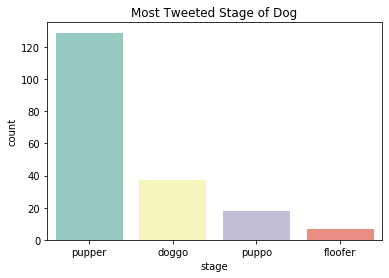

In [55]:
# count the occurrence of each class 
points = master_df.stage.value_counts().index
# create bar chart
sns.countplot(master_df.stage, order=points, palette="Set3")
plt.title('Most Tweeted Stage of Dog');

As shown above, Pupper is the common stage of a dog between the shared photos in the WeRateDogs Twitter account.

#### 2. What is the most predicted breed of dog?

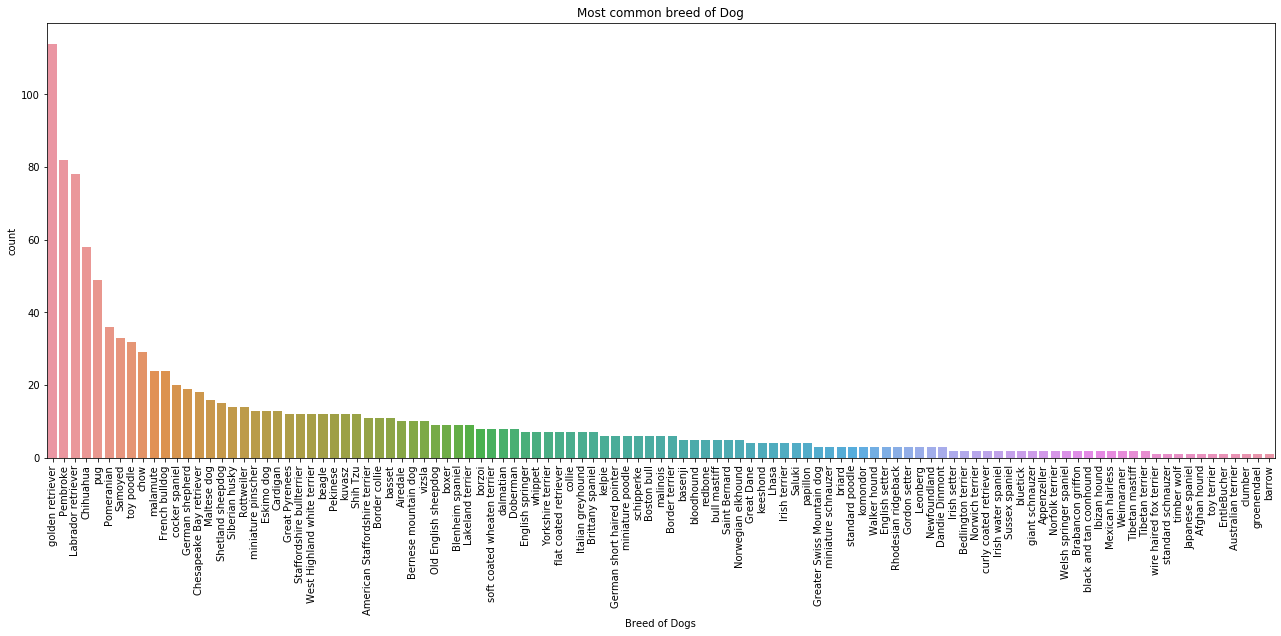

In [56]:
# create a figure and axis 
dim = (22, 8)
fig, ax = plt.subplots(figsize=dim)
# count the occurrence of each class 
points = master_df.p1.value_counts().index
# create bar chart
sns.countplot(master_df.p1, order=points)
plt.xticks(rotation=90)
# set title and labels 
plt.title('Most common breed of Dog')
plt.xlabel('Breed of Dogs');

Above all dog breeds, Golden Retriever is the most predicted breed among the shared photos in the WeRateDogs Twitter account.

#### 3. What is the most retweeted tweet information?

In [57]:
master_df.retweet_count.max()

79515

In [58]:
master_df[master_df['retweet_count'] == 79515]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
988,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,...,0.825333,True,ice bear,0.044681,False,whippet,0.018442,True,79515,131075


In [59]:
master_df.favorite_count.max()

131075

In [60]:
master_df.jpg_url.iloc[988]

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

<img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg">

In [61]:
master_df.p1.iloc[988]

'Labrador retriever'

As indicated above, the most retweeted tweet is the most liked one too, with 79515 retweets, and 131075 likes. The tweet shows a Doggo Labrador Retriever with a rate of 13/10.

#### 4. Is there a relatioship between retweets and likes? 

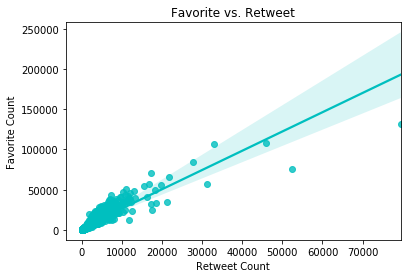

In [62]:
sns.regplot(data=master_df, x='retweet_count', y='favorite_count', color='c');
plt.title('Favorite vs. Retweet')
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

There is a tendency that people like the tweet as the retweets increases, i.e., there is a direct relationship between the number of retweets and the number of likes.

#### 5. What is the most used source for Twitter?

In [63]:
master_df.source.value_counts()

Twitter for iPhone    1139
Twitter Web Client      13
TweetDeck                5
Name: source, dtype: int64

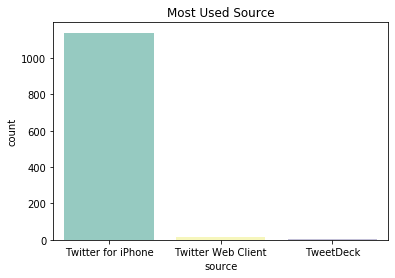

In [64]:
# count the occurrence of each class 
points = master_df.source.value_counts().index
# create bar chart
sns.countplot(master_df.source, order=points, palette="Set3")
plt.title('Most Used Source');

The graph above illustrates that most of the users have tweeted using iPhone.

##### Created by Bushra Alsunaidi on Aug 30, 2020.